In [24]:
# import mpld3
# mpld3.enable_notebook()
import numpy as np
import pandas as pd
from os import listdir
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from kneed import KneeLocator
%matplotlib inline

In [25]:
# step 1 - DBSCAN algorithm - generate clusters
"""calculating DBSCAN and exporting the data with and without the outliers"""
def DBSCAN_Extractor():    
#     folders = [f for f in listdir("3Ddata/")]
    folders = ['newData']
    # print(folders)
    for folder in folders:
        onlyfiles = [f for f in listdir("3Ddata/{}".format(folder)) ]
    #     print(onlyfiles)
        for file in onlyfiles:
            path = "3Ddata/{}/{}".format(folder, file)
            df = pd.read_csv(path)

            icedf = df[df.iceLabel == 1]

            clusterdf = icedf[['Points:0', 'Points:1', 'Points:2', 'd', 'T']]

            data = clusterdf[["Points:0","Points:1","Points:2"]].to_numpy()

            minimumPoints = icedf.origId.value_counts().max()
#             print("minimum points", minimumPoints)
#             minimumPoints = 38

            neigh = NearestNeighbors(n_neighbors=3)
            nbrs = neigh.fit(data)
            distances, indices = nbrs.kneighbors(data)

            distances = np.sort(distances, axis=0)
            distances = distances[:,1]


            kneedle = KneeLocator(range(1,len(distances)+1),  #x values
                          distances, # y values
                          S=1.0, #parameter suggested from paper
                          curve="concave", #parameter from figure
                          direction="increasing", #parameter from figure
                          online=True
                         ) 
            epsilon = kneedle.knee_y
            
#             print("epsilon", epsilon)

            m = DBSCAN(eps=epsilon, min_samples=minimumPoints)
            m.fit(data)

            clusters = m.labels_
            clNum = len(set(m.labels_))

            print("{} time {} has {} clusters".format(folder, file, clNum))

            result = icedf.copy()
            result["cluster"] = clusters
            result = result.drop(columns=['Unnamed: 0'])
            result = result.reset_index()
            result = result.drop(columns=['index'])

            result.to_csv('output/withOutliers/{}/{}'.format(folder, file), index=False)
#             print("exported with outliers")

#             onlyClusters = list(range(clNum))

#             withoutOutlier = result[result['cluster'].isin(onlyClusters)].copy()

#             withoutOutlier.to_csv('output/withoutOutliers/{}/{}'.format(folder, file), index=False)
#             print("exporter without outliers")
            
DBSCAN_Extractor()

newData time 210.csv has 6 clusters
newData time 211.csv has 7 clusters
newData time 212.csv has 6 clusters
newData time 213.csv has 6 clusters
newData time 214.csv has 7 clusters
newData time 215.csv has 8 clusters
newData time 216.csv has 9 clusters
newData time 217.csv has 12 clusters
newData time 218.csv has 10 clusters
newData time 219.csv has 11 clusters


In [29]:
# step 2 - create labels for the clusters for node-link diagram AND change the cluster labels
# copy the dbscan out put to nodeLinkData/input folder
"""cleaning the with Outlier data 
set cluster label 0 and -1 to another cluster label
-1 will be 1
0 will be 2
1 will be 3 and so on"""

def createNodeLinkLabels() :    
#     folders = [f for f in listdir("nodeLinkData/input/withOutliers/")]
    folders = ['newData']
    # print(folders)
    for folder in folders:
        count = 0
        print(folder)
        onlyfiles = [f for f in listdir("nodeLinkData/input/withOutliers/{}".format(folder)) ]
    #     print(onlyfiles)
        for file in onlyfiles:
            temp = []
#             print(file)
            name = file.replace(".csv","")
#             print(name)
            path = "nodeLinkData/input/withOutliers/{}/{}".format(folder, file)
            df = pd.read_csv(path)
            
#             df.head()
            
#             print(df.empty)

#             print(df[df.cluster == -1])

            tempdf = df.copy()
            tempdf = tempdf[tempdf.cluster != -1]
            
            cldf = tempdf['cluster'].value_counts().rename_axis('clusterGroup').reset_index(name='value')
            cldf = cldf.sort_values(by='value', ascending=False)
            
            cldfLabel = cldf['clusterGroup'].tolist()
#             print(cldf.head())

            
            if(tempdf.empty == False):
                newcldfL = list(range(2, len(cldfLabel) + 2))
                newcldfL.append(1)
                cldfLabel.append(-1)
            else:
                newcldfL = [1]
                cldfLabel.append(-1)
                
            for i in range(len(cldfLabel)):
                if(count == 0):
                    count = min(newcldfL)
                    temp.append(count)
                else:
                    count = count + 1
                    temp.append(count)
            print("cluster labels without -1 ",cldfLabel)
            print("new cluster labels without -1 ",newcldfL)
            print(temp)


#             print('"{}":[{}, {}]'.format(name, newLabels[0], newLabels[len(newLabels) - 1]))
    
            df['cluster'] = df['cluster'].replace(cldfLabel,newcldfL)
            test = df['cluster'].replace(sorted(newcldfL),temp)
            df['nodeCluster'] = test
#             print(df.head())

#             print(df['cluster'].value_counts())
            
            df.to_csv('nodeLinkData/output/withOutliers/{}/{}'.format(folder, file), index=False)

            print("node-link label created - ", file)
#     print(count)
#     print(len(temp))
            
createNodeLinkLabels()

newData
cluster labels without -1  [4, 1, 3, 2, 0, -1]
new cluster labels without -1  [2, 3, 4, 5, 6, 1]
[1, 2, 3, 4, 5, 6]
node-link label created -  210.csv
cluster labels without -1  [5, 4, 1, 3, 0, 2, -1]
new cluster labels without -1  [2, 3, 4, 5, 6, 7, 1]
[7, 8, 9, 10, 11, 12, 13]
node-link label created -  211.csv
cluster labels without -1  [4, 3, 2, 1, 0, -1]
new cluster labels without -1  [2, 3, 4, 5, 6, 1]
[14, 15, 16, 17, 18, 19]
node-link label created -  212.csv
cluster labels without -1  [4, 2, 3, 1, 0, -1]
new cluster labels without -1  [2, 3, 4, 5, 6, 1]
[20, 21, 22, 23, 24, 25]
node-link label created -  213.csv
cluster labels without -1  [5, 4, 2, 1, 3, 0, -1]
new cluster labels without -1  [2, 3, 4, 5, 6, 7, 1]
[26, 27, 28, 29, 30, 31, 32]
node-link label created -  214.csv
cluster labels without -1  [6, 4, 5, 3, 1, 0, 2, -1]
new cluster labels without -1  [2, 3, 4, 5, 6, 7, 8, 1]
[33, 34, 35, 36, 37, 38, 39, 40]
node-link label created -  215.csv
cluster labels with

In [6]:
# dont run
"""cleaning the with Outlier data 
set cluster label 0 and -1 to another cluster label
-1 will be 1
0 will be 2
1 will be 3 and so on
"""

def changeClusterGroup() :    
#     folders = [f for f in listdir("output/withOutliers/")]
    folders = ['newData']
    # print(folders)

    for folder in folders:
        print(folder)
        onlyfiles = [f for f in listdir("output/withOutliers/{}".format(folder)) ]
    #     print(onlyfiles)
        for file in onlyfiles:
#             print(file)
            name = file.replace(".csv","")
#             print(name)
            path = "output/withOutliers/{}/{}".format(folder, file)
            df = pd.read_csv(path)
            
#             df.head()
            
#             print(df.empty)

#             print(df['cluster'].value_counts())

            tempdf = df.copy()
            tempdf = tempdf[tempdf.cluster != -1]
            
            cldf = tempdf['cluster'].value_counts().rename_axis('clusterGroup').reset_index(name='value')
            cldf = cldf.sort_values(by='value', ascending=False)
            
            cldfLabel = cldf['clusterGroup'].tolist()
#             print(cldf.head())

            
            if(tempdf.empty == False):
                newcldfL = list(range(2, len(cldfLabel) + 2))
                newcldfL.append(1)
                cldfLabel.append(-1)
            else:
                newcldfL = [1]
                cldfLabel.append(-1)
                
#             print("cluster labels without -1 ",cldfLabel)
#             print("new cluster labels without -1 ",newcldfL)
          


#             print('"{}":[{}, {}]'.format(name, newLabels[0], newLabels[len(newLabels) - 1]))
    
            df['cluster'] = df['cluster'].replace(cldfLabel,newcldfL)
#             print(df.head())

#             print(df['cluster'].value_counts())
            
            df.to_csv('output/withOutliers/{}/{}'.format(folder, file), index=False)

            print("exported with outliers - ", file)
            
changeClusterGroup()

newData
exported with outliers -  210.csv
exported with outliers -  211.csv
exported with outliers -  212.csv
exported with outliers -  213.csv
exported with outliers -  214.csv
exported with outliers -  215.csv
exported with outliers -  216.csv
exported with outliers -  217.csv
exported with outliers -  218.csv
exported with outliers -  219.csv


In [4]:
"""cleaning the without Outlier data 
set cluster label 0 to another cluster label
to have the same cluster numbber
0 will be 2
1 will be 3 an so on
"""

def changeClusterGroup() :    
    folders = [f for f in listdir("output/withoutOutliers/")]
    # print(folders)
    for folder in folders:
        onlyfiles = [f for f in listdir("output/withoutOutliers/{}".format(folder)) ]
        print(onlyfiles)
        for file in onlyfiles:
            name = file.replace(".csv","")
            
            path = "output/withoutOutliers/{}/{}".format(folder, file)
            df = pd.read_csv(path)
            
#             print(df.empty)

#             print(df['cluster'].value_counts())
            labels = sorted(df['cluster'].value_counts().index.tolist())
#             print(labels)

            newLabels = list(range(2, len(labels) + 2))
#             print(newLabels)
        
            if(newLabels):
                print('"{}":[{}, {}]'.format(name, newLabels[0], newLabels[len(newLabels) - 1]))
    
    
            df['cluster'] = df['cluster'].replace(labels,newLabels)
#             print(df['cluster'].value_counts())
            
#             df.to_csv('output/withoutOutliers/{}/{}'.format(folder, file), index=False)
#             print("exporter without outliers")
            
changeClusterGroup()

['0.06.csv', '0.07.csv', '0.08.csv', '0.09.csv', '0.1.csv', '0.11.csv', '0.12.csv', '0.13.csv', '0.14.csv', '0.15.csv', '0.16.csv', '0.17.csv', '0.18.csv', '0.19.csv', '0.2.csv']
"0.07":[2, 6]
"0.08":[2, 34]
"0.09":[2, 17]
"0.1":[2, 6]
"0.11":[2, 6]
"0.12":[2, 2]
"0.13":[2, 3]
"0.14":[2, 5]
"0.15":[2, 4]
"0.16":[2, 5]
"0.17":[2, 3]
"0.18":[2, 4]
"0.19":[2, 4]
"0.2":[2, 6]
['0.06.csv', '0.07.csv', '0.08.csv', '0.09.csv', '0.1.csv', '0.11.csv', '0.12.csv', '0.13.csv', '0.14.csv', '0.15.csv', '0.16.csv', '0.17.csv', '0.18.csv', '0.19.csv', '0.2.csv']
"0.07":[2, 4]
"0.08":[2, 33]
"0.09":[2, 8]
"0.1":[2, 5]
"0.11":[2, 8]
"0.12":[2, 5]
"0.13":[2, 3]
"0.14":[2, 2]
"0.15":[2, 2]
"0.16":[2, 6]
"0.17":[2, 3]
"0.18":[2, 6]
"0.19":[2, 6]
"0.2":[2, 4]
['0.06.csv', '0.07.csv', '0.08.csv', '0.09.csv', '0.1.csv', '0.11.csv', '0.12.csv', '0.13.csv', '0.14.csv', '0.15.csv', '0.16.csv', '0.17.csv', '0.18.csv', '0.19.csv', '0.2.csv']
"0.07":[2, 14]
"0.08":[2, 38]
"0.09":[2, 10]
"0.1":[2, 6]
"0.11":[2, 4]


In [20]:
folder = 'contrails1'
file='0.1.csv'
path = "output/withOutliers/{}/{}".format(folder, file)
df = pd.read_csv(path)
print(df.shape)
df2 = df['Points:1'].value_counts().rename_axis('Points:1').reset_index(name='test')
print(df.head())
df2.head()
print(sorted(df['cluster'].tolist()))

(50578, 8)
   origId  iceLabel        d       T  Points:0  Points:1  Points:2  cluster
0    1525         1  0.00001  238.67    4.6209  0.101700 -0.000004        2
1    1525         1  0.00001  238.67    4.6209  0.100156  0.017656        2
2    1525         1  0.00001  238.67    4.6209  0.095568  0.034779        2
3    1525         1  0.00001  238.67    4.6209  0.088077  0.050846        2
4    1525         1  0.00001  238.67    4.6209  0.077909  0.065368        2
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [12]:
path = "3Ddata/newData/210.csv"

# path = "data/contrails1/0.2.csv"
df = pd.read_csv(path)

icedf = df[df.iceLabel == 1]

clusterdf = icedf[['Points:0', 'Points:1', 'Points:2', 'd', 'T']]

icedf.head()

,Unnamed: 0,origId,iceLabel,d,T,Points:0,Points:1,Points:2
7955,7955,3692,1,6.109600e-08,228.16,4.8062,0.388890,5.969800e-12
7956,7956,3692,1,6.109600e-08,228.16,4.8062,0.382982,6.753004e-02
7957,7957,3692,1,6.109600e-08,228.16,4.8062,0.365437,1.330082e-01
7958,7958,3692,1,6.109600e-08,228.16,4.8062,0.336789,1.944450e-01
7959,7959,3692,1,6.109600e-08,228.16,4.8062,0.297907,2.499737e-01


<IPython.core.display.Javascript object>


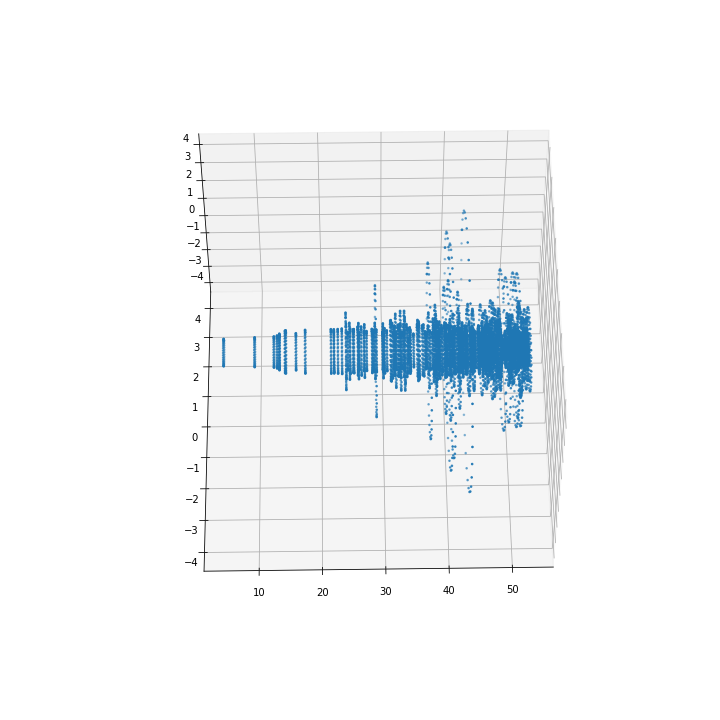

In [13]:
data = clusterdf[["Points:0","Points:1","Points:2"]].to_numpy()

# data = clusterdf[["d", "T"]].to_numpy()
%matplotlib notebook
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(data[:,0], data[:,1], data[:,2], s=2.5)
# ax.view_init(azim=200)
plt.show()

In [21]:
minimumPoints = icedf.origId.value_counts().max()
minimumPoints

38

In [15]:
scaler = preprocessing.StandardScaler().fit(data)
data_scaled = scaler.transform(data)

In [16]:
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

13262


<IPython.core.display.Javascript object>


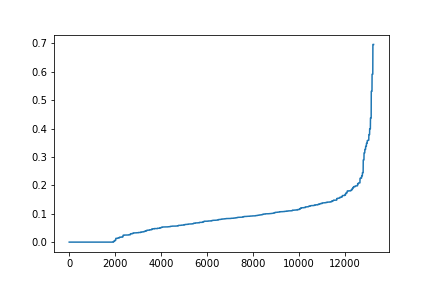

In [17]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
print(len(distances))
%matplotlib notebook
plt.plot(distances)

<IPython.core.display.Javascript object>


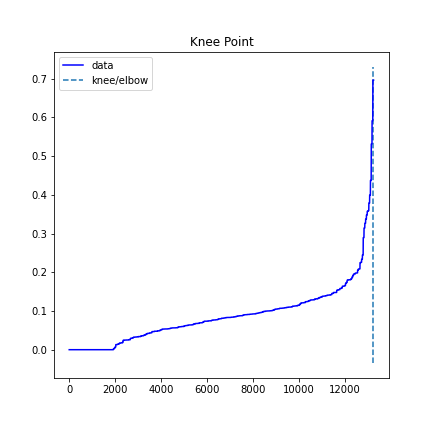

0.6960780550284448


In [18]:
kneedle = KneeLocator(range(1,len(distances)+1),  #x values
                      distances, # y values
                      S=1.0, #parameter suggested from paper
                      curve="concave", #parameter from figure
                      direction="increasing", #parameter from figure
                      online=True
                     ) 

kneedle.plot_knee()
print(kneedle.knee_y)
epsilon = kneedle.knee_y

In [19]:
m = DBSCAN(eps=epsilon, min_samples=minimumPoints)
m.fit(data)

DBSCAN(eps=0.6960780550284448, min_samples=38)

In [20]:
clusters = m.labels_
print("number of cluster found: {}".format(len(set(m.labels_))))
print('cluster for each point: ', m.labels_)

# for c in clusters:
#     print(c)

number of cluster found: 6
cluster for each point:  [-1 -1 -1 ...  4  4  4]


In [22]:
# colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
colors = ['red', 'yellow', 'orange', 'green', 'blue', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])


<IPython.core.display.Javascript object>


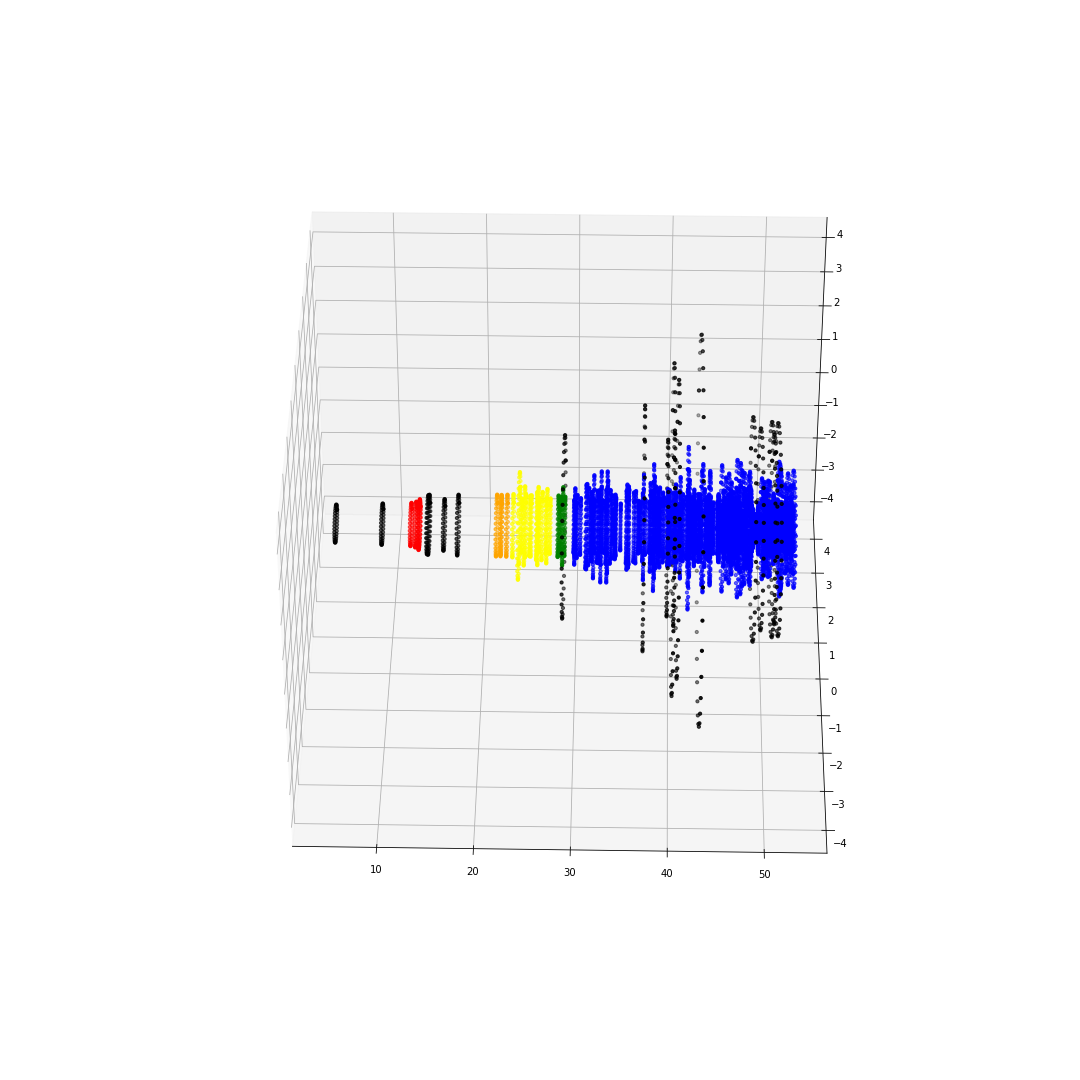

In [23]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(data[:,0], data[:,1], data[:,2], c=vectorizer(clusters), s=10)
# ax.view_init(0)
plt.show()

In [ ]:
result = icedf.copy()
result["cluster"] = clusters
result

In [ ]:
result = result.drop(columns=['Unnamed: 0'])
result = result.reset_index()
result = result.drop(columns=['index'])

In [ ]:
# result.to_csv('0.2_test.csv', index=False)

In [ ]:
withoutOutlier = result[result['cluster'].isin([0,1,2,3,4])].copy()
withoutOutlier['cluster'] = withoutOutlier['cluster'].replace([0],5)
withoutOutlier.cluster.value_counts()

In [ ]:
# withoutOutlier.to_csv('0.2_without_outlier.csv', index=False)

In [ ]:
path = "output/withoutOutliers/{}/{}".format("contrails1", "0.2.csv")
df = pd.read_csv(path)
            
df.head()

In [ ]:
labels = sorted(df['cluster'].value_counts().index.tolist())
labels = [1*i for i in range(10)]
labels

In [ ]:
newLabels = list(range(2, len(labels) + 2))
newLabels

In [ ]:
folders = [f for f in listdir("3Ddata/")]
# print(folders)
for folder in folders:
    onlyfiles = [f for f in listdir("3Ddata/{}".format(folder)) ]
#     print(onlyfiles)
    for file in onlyfiles:
        path = "3Ddata/{}/{}".format(folder, file)
        df = pd.read_csv(path)

        icedf = df[df.iceLabel == 1]

        clusterdf = icedf[['Points:0', 'Points:1', 'Points:2', 'd', 'T']]

        data = clusterdf[["Points:0","Points:1","Points:2"]].to_numpy()

        minimumPoints = icedf.origId.value_counts().max()
        print("minimum points", minimumPoints)


In [15]:
"""calculating DBSCAN and exporting the data with and without the outliers"""
def DBSCAN_Extractor():    
    folders = [f for f in listdir("data/")]
    # print(folders)
    for folder in folders:
        onlyfiles = [f for f in listdir("data/{}".format(folder)) ]
    #     print(onlyfiles)
        for file in onlyfiles:
            path = "data/{}/{}".format(folder, file)
            df = pd.read_csv(path)

            icedf = df[df.iceLabel == 1]

            clusterdf = icedf[['Points:0', 'Points:1', 'Points:2']]

            data = clusterdf[["Points:0","Points:1","Points:2"]].to_numpy()

#             minimumPoints = icedf.origId.value_counts().max()
#             print("minimum points", minimumPoints)
#             minimumPoints = 38

            if len(data) < 38 :
                pass
            else: 
                minimumPoints = 38

                neigh = NearestNeighbors(n_neighbors=3)
                nbrs = neigh.fit(data)
                distances, indices = nbrs.kneighbors(data)

                distances = np.sort(distances, axis=0)
                distances = distances[:,1]


                kneedle = KneeLocator(range(1,len(distances)+1),  #x values
                              distances, # y values
                              S=1.0, #parameter suggested from paper
                              curve="concave", #parameter from figure
                              direction="increasing", #parameter from figure
                              online=True
                             ) 
                epsilon = kneedle.knee_y

                m = DBSCAN(eps=epsilon, min_samples=minimumPoints)
                m.fit(data)

                clusters = m.labels_
                clNum = len(set(m.labels_))

                print("{} time {} has {} clusters".format(folder, file, clNum))

#             result = icedf.copy()
#             result["cluster"] = clusters
#             result = result.drop(columns=['Unnamed: 0'])
#             result = result.reset_index()
#             result = result.drop(columns=['index'])

#             result.to_csv('output/withOutliers/{}/{}'.format(folder, file), index=False)
#             print("exported with outliers")

#             onlyClusters = list(range(clNum))

#             withoutOutlier = result[result['cluster'].isin(onlyClusters)].copy()

#             withoutOutlier.to_csv('output/withoutOutliers/{}/{}'.format(folder, file), index=False)
#             print("exporter without outliers")
            
DBSCAN_Extractor()

contrails1 time 0.07.csv has 1 clusters
contrails1 time 0.08.csv has 1 clusters
contrails1 time 0.09.csv has 3 clusters
contrails1 time 0.1.csv has 2 clusters
contrails1 time 0.11.csv has 8 clusters
contrails1 time 0.12.csv has 10 clusters
contrails1 time 0.13.csv has 12 clusters
contrails1 time 0.14.csv has 10 clusters
contrails1 time 0.15.csv has 7 clusters
contrails1 time 0.16.csv has 10 clusters
contrails1 time 0.17.csv has 1 clusters
contrails1 time 0.18.csv has 4 clusters
contrails1 time 0.19.csv has 2 clusters
contrails1 time 0.2.csv has 2 clusters
